# DATASET - Housing dataset into a data frame

The features of the 506 examples in the Housing dataset have been taken from the original source that was previously shared on https://archive.ics.uci.edu/ml/ datasets/Housing and summarized here:

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river and 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk ‚Äì 0.63)2, where Bk is the proportion of people of African American descent by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Visualizing the important characteristics of a dataset

In [2]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()
plt.savefig('scatterplotmatrix.png')

<Figure size 1000x800 with 25 Axes>

## Correlation matrix

We can interpret the correlation matrix as being a rescaled version of the covariance matrix. In fact, the correlation matrix is identical to a covariance matrix computed from standardized features.

The correlation matrix is a square matrix that contains the Pearson product-moment correlation coefficient (often abbreviated as Pearson's r), which measures the
linear dependence between pairs of features. The correlation coefficients are
in the range ‚Äì1 to 1. Two features have a perfect positive correlation if r = 1,
no correlation if r = 0, and a perfect negative correlation if r = ‚Äì1

In [3]:
from mlxtend.plotting import heatmap 
import numpy as np

cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm,
             row_names=cols,
             column_names=cols)
plt.show()
plt.savefig('correlationmatrix.png')

<Figure size 432x288 with 0 Axes>

MEDV, shows the largest correlation with the LSTAT variable (-0.74)

From inspecting the scatterplot matrix, there is a clear nonlinear relationship between LSTAT and MEDV

On the other hand, the correlation between RM and MEDV is also relatively high (0.70)

And also from scatterplotmatrix RM and MEDV has nice relationship

In [4]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
    
    
rooms = df[['RM']].values # rooms
prices = df['MEDV'].values # prices


from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
rooms_std = sc_x.fit_transform(rooms)
prices_std = sc_y.fit_transform(prices[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(rooms_std, prices_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig('costFunction.png')
plt.show()

let's visualize how well the linear regression line fits the training data

In [5]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

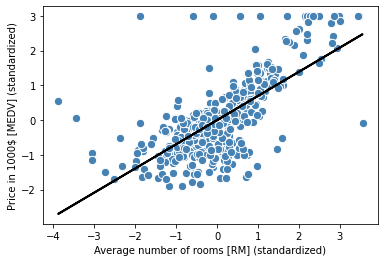

<Figure size 432x288 with 0 Axes>

In [6]:
lin_regplot(rooms_std, prices_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in 1000$ [MEDV] (standardized)')
plt.show()
plt.savefig('rooms_vs_price.png')

### Used the previously trained linear regression model to predict the price of a house with five rooms

To scale the predicted price outcome back onto the Price in $1000s axis, simply apply the inverse_transform method of the StandardScaler

In [7]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in 1000$: %.3f" % sc_y.inverse_transform(price_std))
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Price in 1000$: 10.840
Slope: 0.695
Intercept: -0.000


# Linear Regression via Scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(rooms, prices)
prices_predicted = slr.predict(rooms)
print('Intercept: %.3f' % slr.intercept_)

Intercept: -34.671


In [9]:
lin_regplot(rooms, prices, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in 1000$ [MEDV]')
plt.show()

# Fitting a robust regression model using RANSAC

As an alternative to throwing out outliers, we will look at a robust method of regression using the RANdom SAmple Consensus (RANSAC) algorithm, which fits a regression model to a subset of the data, the so-called inliers.

RANSAC algorithm:
1. Select a random number of examples to be inliers and fit the model.
2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
3. Refit the model using all inliers.
4. Estimate the error of the fitted model versus the inliers.
5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations were reached; go back to step 1 otherwise.

In [10]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100,      # maximum number of iterations 
                         min_samples=50,      # minimum number of the randomly chosen training examples to be at least 50
                         loss='absolute_loss',  # algorithm computes absolute vertical distances between the fitted line and the training examples
                         residual_threshold=5.0,  # only allow training examples to be included in the inlier set if their vertical distance to the fitted line is within 5 distance units
                         random_state=0)

ransac.fit(rooms, prices)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

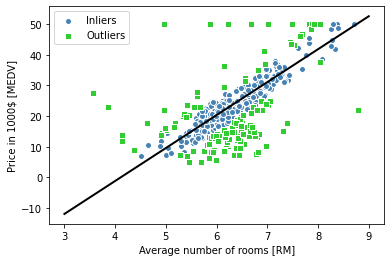

<Figure size 432x288 with 0 Axes>

In [11]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_rooms = np.arange(3, 10, 1)
line_prices_ransac = ransac.predict(line_rooms[:, np.newaxis])

plt.scatter(rooms[inlier_mask], prices[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(rooms[outlier_mask], prices[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers')
plt.plot(line_rooms, line_prices_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in 1000$ [MEDV]')
plt.legend(loc='upper left')
plt.show()
plt.savefig('RANSAC.png')

linear regression model was fitted on the detected set of inliers, which are shown as circles

In [12]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


Using RANSAC, we reduced the potential effect of the outliers in this dataset, but we don't know whether this approach will have a positive effect on the predictive performance for unseen data or not

# Evaluating the performance of linear regression models

use all variables in the dataset and train a multiple regression model

In [13]:
from sklearn.model_selection import train_test_split

rooms = df.iloc[:, :-1].values
prices = df['MEDV'].values

rooms_train, rooms_test, prices_train, prices_test = train_test_split(rooms, prices, test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(rooms_train, prices_train)

prices_train_pred = slr.predict(rooms_train)
prices_test_pred = slr.predict(rooms_test)

Can't visualize the linear regression line (or hyperplane, to be precise) in a two-dimensional plot

we can plot the residuals (the differences or vertical distances between the actual and predicted values) versus the predicted values to diagnose our regression model. Residual plots are a commonly used graphical tool for diagnosing regression models. They can help to detect nonlinearity and outliers, and check whether the errors are randomly distributed

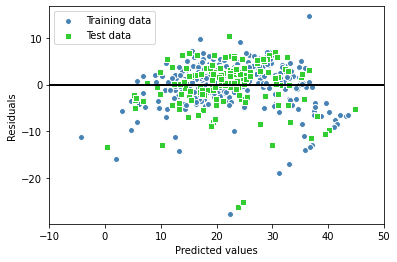

In [14]:
plt.scatter(prices_train_pred, prices_train_pred - prices_train,
           c='steelblue', marker='o', edgecolor='white', label='Training data')

plt.scatter(prices_test_pred, prices_test_pred - prices_test,
           c='limegreen', marker='s', edgecolor='white', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In the case of a perfect prediction, the residuals would be exactly zero, which we will probably never encounter in realistic and practical applications.

## MSE (Mean squared error)

Another useful quantitative measure of a model's performance is the so-called mean squared error (MSE), which is simply the averaged value of the SSE cost that we minimized to fit the linear regression model. The MSE is useful for comparing different regression models or for tuning their parameters via grid search and cross- validation

In [15]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(prices_train, prices_train_pred),
                                      mean_squared_error(prices_test, prices_test_pred)))

MSE train: 19.958, test: 27.196


You can see that the MSE on the training dataset is 19.96, and the MSE on the test dataset is much larger, with a value of 27.20, which is an indicator that our model is overfitting the training data in this case

### coefficient of determination

= standardized version of the MSE, for better interpretability of the model's performance, useful in these problems:

(10K ‚àí 15K)2 < (10,000 ‚àí 15,000)2

For the training dataset, the R^2 is bounded between 0 and 1, but it can become negative for the test dataset. 

If R^2 = 1, the model fits the data perfectly with a corresponding MSE = 0


In [16]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
     (r2_score(prices_train, prices_train_pred),
     (r2_score(prices_test, prices_test_pred))))

R^2 train: 0.765, test: 0.673


# Using regularized methods for regression

- Ridge Regression
- least absolute shrinkage and selection operator (LASSO)
- elastic Net

regularization strength is regulated by the parameter alpha

more info - http://scikit-learn.org/stable/modules/linear_model.html

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) 

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Polynomial regression

y = w0 + w1x + w2x^2 + ..... + wdx^d

d denotes the degree of the polynomial

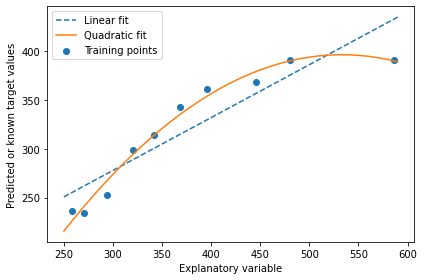

<Figure size 432x288 with 0 Axes>

In [18]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# fit simple linear regression model for comparision
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit multiple regression model on the transformed features for polynomial regression
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='Training points')

plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')

plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('polynomial_regression.png')

In [19]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)


print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


# Modeling nonlinear relationships in the Housing dataset

model the relationship between house prices and LSTAT (percentage of lower status of the population) using second-degree (quadratic) and third-degree (cubic) polynomials and compare that to a linear fit

In [20]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

# linear regression
plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

# quadratic regression
plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

# cubic regression
plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.savefig('lin_quad_cubic.png')
plt.show()

Cubic fit captures the relationship between house prices and LSTAT better than the linear and quadratic fit. However, you should be aware that adding more and more polynomial features increases the complexity of a model and therefore increases the chance of overfitting

In [21]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.savefig('log.png')
plt.show()


After transforming the explanatory onto the log space and taking the square root of the target variables, we were able to capture the relationship between the two variables with a linear regression line that seems to fit the data better (ùëÖùëÖ2 = 0.69) than any of the previous polynomial feature transformations:

# Dealing with nonlinear relationships using random forests

via the decision
tree algorithm, we subdivide the input space into smaller regions that become more manageable

An advantage of the decision tree algorithm is that it does not require any transformation of the features if we are dealing with nonlinear data, because decision trees analyze one feature at a time, rather than taking weighted combinations into account

In [22]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in 1000$ [MEDV]')
plt.show()
plt.savefig('randomforests.png')

<Figure size 432x288 with 0 Axes>

A random forest usually has a better generalization performance than an individual decision tree due to randomness, which helps to decrease the model's variance. Other advantages of random forests are that they are less sensitive to outliers in the dataset and don't require much parameter tuning.

The only parameter in random forests that we typically need to experiment with is the number of trees in the ensemble.

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


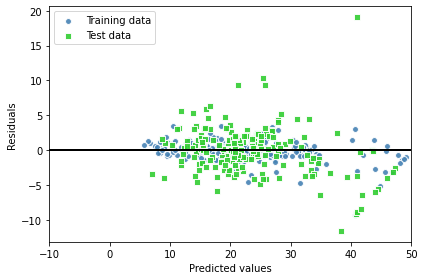

In [23]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Training data')

plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.savefig('randomForest.png')
plt.show()

Unfortunately, there is not a universal approach for dealing with non-randomness in residual plots, and it requires experimentation. Depending on the data that is available to us, we may be able to improve the model by transforming variables, tuning the hyperparameters of the learning algorithm, choosing simpler or more complex models, removing outliers, or including additional variables